<a href="https://colab.research.google.com/github/ijazahmad-star/Colab-Workspace/blob/main/oct%2020%202025/Multi_Agent_System_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_google_genai langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's depen

In [ ]:
from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')

In [ ]:
from typing import Annotated, TypedDict
from langchain_core.messages import HumanMessage, SystemMessage, AnyMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
import operator, json, os

from IPython.display import Image, display
from pydantic import BaseModel, Field
from typing import Literal


In [ ]:
from typing import TypedDict, Literal
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

class State(TypedDict):
    topic: str
    content: str
    feedback: str
    quality: str


In [ ]:
class Feedback(BaseModel):
    quality: Literal["good", "bad"] = Field(
        description="Decide if the generated content is good or needs improvement.",
    )
    feedback: str = Field(
        description="If the content is bad, provide feedback on how to improve it.",
    )

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.3,
    google_api_key=api_key,
)

evaluator = llm.with_structured_output(Feedback)


In [ ]:
def llm_call_generator(state: State):
    """Generate or improve content."""
    if state.get("feedback"):
        msg = llm.invoke(
            f"Write improved content about '{state['topic']}' considering this feedback: {state['feedback']}"
        )
    else:
        msg = llm.invoke(f"Create a content about '{state['topic']}'")
    return {"content": msg.content}


def llm_call_evaluator(state: State):
    """Evaluate the content and provide structured feedback."""
    grade = evaluator.invoke(f"Evaluate this content: {state['content']}")
    return {"quality": grade.quality, "feedback": grade.feedback}


def route_content(state: State):
    """Route based on evaluation result."""
    if state["quality"] == "good":
        return "Accepted"
    elif state["quality"] == "bad":
        return "Needs Improvement"


In [ ]:
builder = StateGraph(State)

builder.add_node("llm_call_generator", llm_call_generator)
builder.add_node("llm_call_evaluator", llm_call_evaluator)

builder.add_edge(START, "llm_call_generator")
builder.add_edge("llm_call_generator", "llm_call_evaluator")

builder.add_conditional_edges(
    "llm_call_evaluator",
    route_content,
    {
        "Accepted": END,
        "Needs Improvement": "llm_call_generator",
    },
)

workflow = builder.compile()


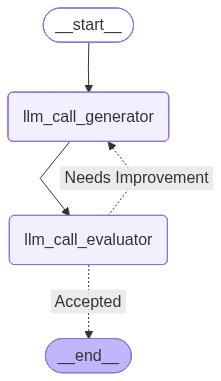

In [ ]:
display(Image(workflow.get_graph().draw_mermaid_png()))

In [ ]:
state = workflow.invoke({"topic": "AI for mental health awareness"})
print("\n Final Improved Content:\n")
print(state["content"])
print("\n Feedback:", state["feedback"])



 Final Improved Content:

## The AI Ally: Boosting Mental Health Awareness in the Digital Age

Mental health is no longer a whispered secret; it's a global conversation, a critical component of overall well-being. Yet, stigma, lack of access, and misinformation continue to be significant barriers. Enter Artificial Intelligence (AI) – a powerful, evolving ally that's not just revolutionizing treatment, but also playing a crucial role in **boosting mental health awareness**.

Far from replacing human connection, AI is emerging as a sophisticated tool to democratize information, personalize support, and foster a more open, understanding environment around mental health. Here's how:

---

### 1. Breaking Down Stigma & Fostering Openness

One of AI's most profound contributions to awareness is its ability to create a safe, anonymous space for exploration.

*   **Judgment-Free Zones:** AI-powered chatbots and virtual assistants offer a non-judgmental platform where individuals can articulat

In [ ]:
state = workflow.invoke({"topic": "AI in School"})
print("\n Final Improved Content:\n")
print(state["content"])
print("\n Feedback:", state["feedback"])


 Final Improved Content:

## AI in School: Unlocking Potential, Navigating the Future of Learning

The classroom is changing. From chalkboards to smartboards, education has always evolved with technology. Today, a new, powerful force is entering the learning landscape: Artificial Intelligence (AI). Far from being a futuristic concept, AI is already here, and its integration into schools promises to revolutionize how we teach, learn, and prepare students for the world ahead.

But like any powerful tool, AI in school comes with both immense potential and significant challenges.

---

### The Promise: How AI Can Transform Learning

Imagine a learning environment perfectly tailored to each student. That's the core promise of AI in education:

1.  **Personalized Learning Paths:** AI can analyze a student's learning style, pace, strengths, and weaknesses. It can then recommend customized resources, exercises, and even entire curricula, ensuring every student receives the support they need t